<a href="https://colab.research.google.com/github/Vicnent/Face-Morphing/blob/master/notebooks/BrushstrokeStyleTransfer_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y albumentations
!pip install -U scikit-learn
!pip install scikit-image==0.17.2

Found existing installation: albumentations 1.2.1
Uninstalling albumentations-1.2.1:
  Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.5 MB 25.2 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3


<h3>Ignore the error messages...</h3>

In [2]:
!git clone -b tensorflow_v2 https://github.com/CompVis/brushstroke-parameterized-style-transfer
%cd brushstroke-parameterized-style-transfer

Cloning into 'brushstroke-parameterized-style-transfer'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (2/2), done.
remote: Total 128 (delta 1), reused 1 (delta 1), pack-reused 126
Receiving objects: 100% (128/128), 54.60 MiB | 49.35 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/brushstroke-parameterized-style-transfer


In [3]:
import os
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import tensorflow as tf
tf.test.is_gpu_available()
tf.__version__

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


'2.8.2'

<h1><b>Upload your own images</b></h1>

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving IMG_0320.jpg to IMG_0320.jpg
User uploaded file "IMG_0320.jpg" with length 260485 bytes


<h1><b>Or choose from the available images</b></h1>


<h2>Content Images<h2>

['road.jpg', 'olive_trees_greece.jpg', 'elefant.jpg', 'golden_gate.jpg', 'winxp.jpg']


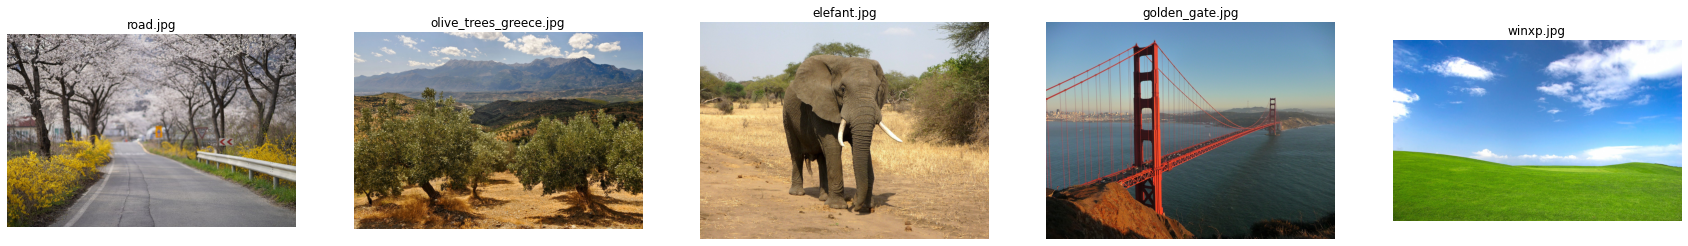

In [5]:
content_images = os.listdir('images/content')
print(content_images)

fig, ax = plt.subplots(nrows=1, ncols=len(content_images), figsize=(30, 5))
for i in range(len(content_images)):
    img = Image.open(os.path.join('images/content/', content_images[i]))
    ax[i].imshow(np.array(img))
    ax[i].axis('off')
    ax[i].title.set_text(content_images[i])

<h2>Style Images<h2>


['derain_mountains_at_colloiure.jpg', 'van_gogh_trees.jpg', 'picasso_self_portrait.jpg', 'van_gogh_starry_night.jpg', 'van_gogh_red_cabbages_and_onions.jpg', 'picasso_weeping_woman.jpg', 'van_gogh_van_gogh_road_cypress.jpg']


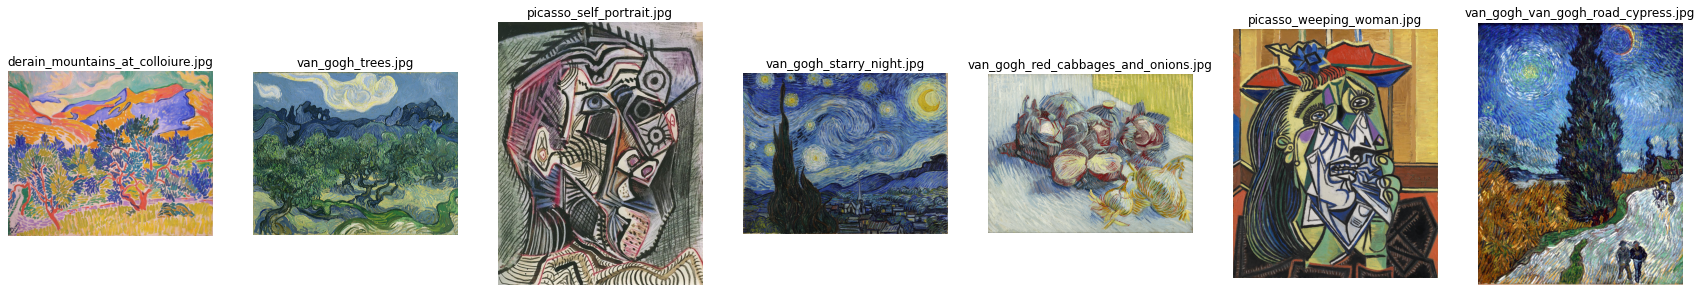

In [5]:
style_images = os.listdir('images/style')
print(style_images)

fig, ax = plt.subplots(nrows=1, ncols=len(style_images), figsize=(30, 5))
for i in range(len(style_images)):
    img = Image.open(os.path.join('images/style/', style_images[i]))
    ax[i].imshow(np.array(img))
    ax[i].axis('off')
    ax[i].title.set_text(style_images[i])

<h1><b>Load content and style images</b></h1>

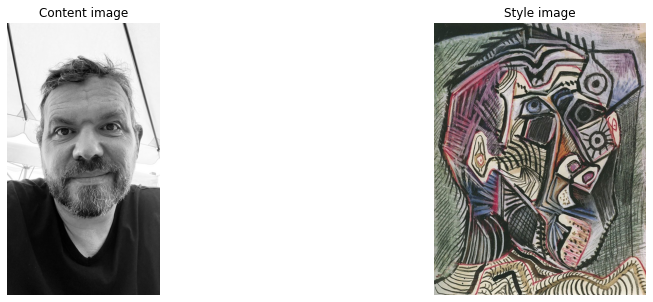

In [6]:
# Note: for uploaded images, the prefix 'images/{content, style}' needs to be removed.
# If you upload an image named 'uploaded_image.jpg', the path to use is also 'uploaded_image.jpg'.

# content_img = Image.open('images/content/golden_gate.jpg')
content_img = Image.open('IMG_0320.jpg')
style_img = Image.open('images/style/picasso_self_portrait.jpg')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(np.array(content_img))
ax[0].axis('off')
ax[0].title.set_text('Content image')

ax[1].imshow(np.array(style_img))
ax[1].axis('off')
ax[1].title.set_text('Style image')

In [7]:
import model


stylized_img = model.stylize(content_img,               # Content image (PIL.Image).
                             style_img,                 # Style image (PIL.Image).
                             num_strokes=5000,          # Number of brushstrokes (int). 
                             num_steps=100,             # Number of stroke optimization steps (int).
                             canvas_color='gray',       # Color of the canvas (str). Options: 'gray', 'white', 'black', 'noise'
                             width_scale=0.1,           # Scale parameter for the brushstroke width (float).
                             length_scale=1.1,          # Scale parameter for the brushstroke length (float).
                             content_weight=1.0,        # Weight for the content loss (float).
                             style_weight=3.0,          # Weight for the style loss (float).
                             tv_weight=0.008,           # Weight for the total variation loss (float). 
                             pixel_resolution=1024,     # Resolution of the canvas for pixel optimization (int).
                             num_steps_pixel=2000)      # Number of pixel optimization steps (int).

stylized_img.save('stylized.jpg')
display(stylized_img)

Downloading: "https://www.dropbox.com/s/hv7b4eajrj7isyq/vgg_weights.pickle" to pretrained_weights/vgg_weights.pickle


100%|██████████| 58.9M/58.9M [00:06<00:00, 9.40MiB/s]


Stroke optimization:


  0%|          | 0/100 [00:24<?, ?it/s]


ResourceExhaustedError: ignored